# Using Random Forest as the algorithm and EAAC as the encoding method, select the window with the highest AUC

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from itertools import cycle
import os, re, sys
from collections import Counter
import Function

In [2]:
parent_dir = os.path.abspath(os.path.dirname(os.getcwd()))

In [4]:
def EAAC(filepath, windows=5):
    AA = 'ACDEFGHIKLMNPQRSTVWY'
    encodings = []
    dataframe = pd.read_csv(filepath)
    label = list(dataframe['Label'])
    sequences = list(dataframe['Sequence'])
    for i in sequences:
        sequence = re.sub('[^ACDEFGHIKLMNPQRSTVWYX]', 'X', ''.join(i).upper())
        code = []
        for j in range(len(sequence)):
            singlecode = []
            if j < len(sequence) and j + windows <= len(sequence):
                count = Counter(re.sub('X', '', sequence[j:j + windows]))
                for key in count:
                    count[key] = count[key] / windows
                for aa in AA:
                    singlecode.append(count[aa])
                code.append(singlecode)
        encodings.append(code)
    return np.array(encodings).astype(np.float64).reshape(len(encodings),-1), np.array(label).astype(np.float64)

In [5]:
windows = [15,17,19,21,23,25,27,29,31,33,35,37,39,41]

In [4]:
filepath = os.path.join(parent_dir, 'Data')
savepath = os.path.join(parent_dir, r'Data\chooseWindows')

In [7]:
def Random_Forest(x_train, y_train, x_test, y_test):
    categories = sorted(set(y_train))
    prediction_result_cv = []
    prediction_result_ind = []
    
    folds = StratifiedKFold(5).split(x_train, y_train)
    for i, (train, valid) in enumerate(folds):
        train_X, train_y = x_train[train], y_train[train]
        valid_X, valid_y = x_train[valid], y_train[valid]
        rfc_model = RandomForestClassifier(n_estimators=350, bootstrap=True, oob_score=True, n_jobs=6)
        rfc = rfc_model.fit(train_X, train_y)
        tmp_result = np.zeros((len(valid_y), len(categories) + 1))
        tmp_result[:, 0], tmp_result[:, 1:] = valid_y, rfc.predict_proba(valid_X)
        prediction_result_cv.append(tmp_result)
        
        tmp_result1 = np.zeros((len(y_test), len(categories) + 1))
        tmp_result1[:, 0], tmp_result1[:, 1:] = y_test, rfc.predict_proba(x_test)
        prediction_result_ind.append(tmp_result1)
        
    return prediction_result_cv, prediction_result_ind

In [8]:
# Create folder
def mkdir(path):
    path=path.strip()
    path=path.rstrip("\\")
    # Check if the path exists
    isExists=os.path.exists(path)
    if not isExists:
        # Create the directory if it doesn't exist
        os.makedirs(path)
    else:
        # Do not create directory if it exists
        pass

**** 15 窗口运算结束***
**** 17 窗口运算结束***
**** 19 窗口运算结束***
**** 21 窗口运算结束***
**** 23 窗口运算结束***


C:\Users\50434\postgraduate\postgraduate_2\DeepSUMO-master\Function.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(7,7))


**** 25 窗口运算结束***
**** 27 窗口运算结束***
**** 29 窗口运算结束***
**** 31 窗口运算结束***
**** 33 窗口运算结束***
**** 35 窗口运算结束***
**** 37 窗口运算结束***
**** 39 窗口运算结束***
**** 41 窗口运算结束***


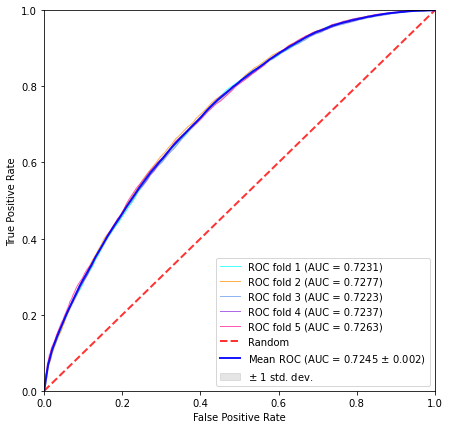

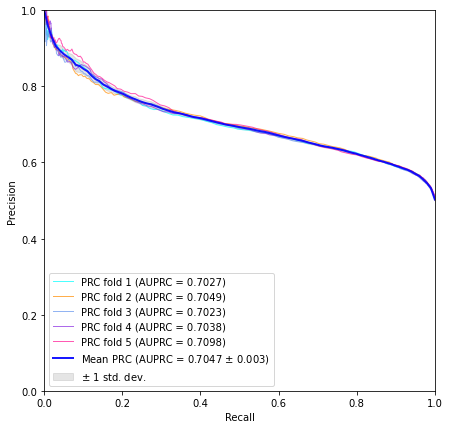

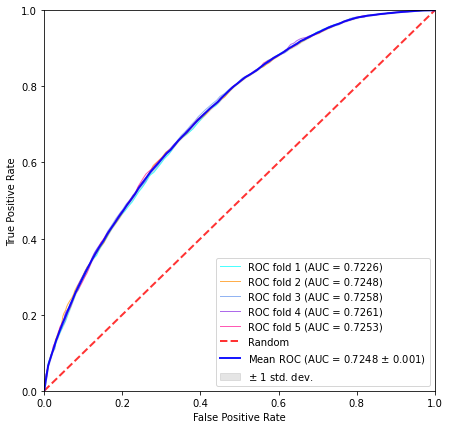

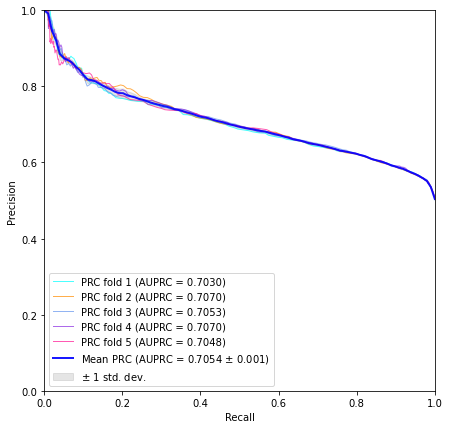

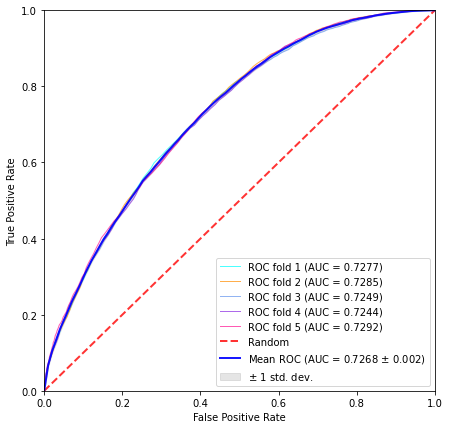

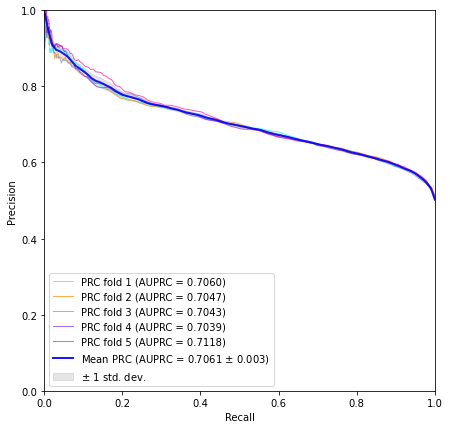

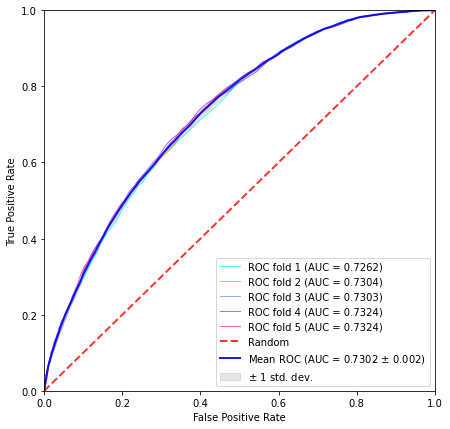

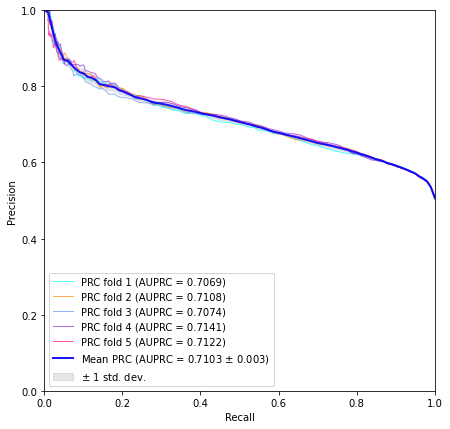

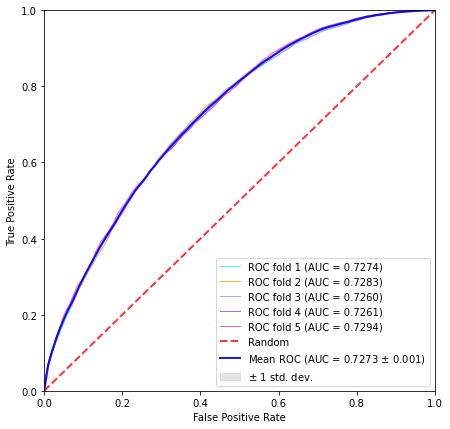

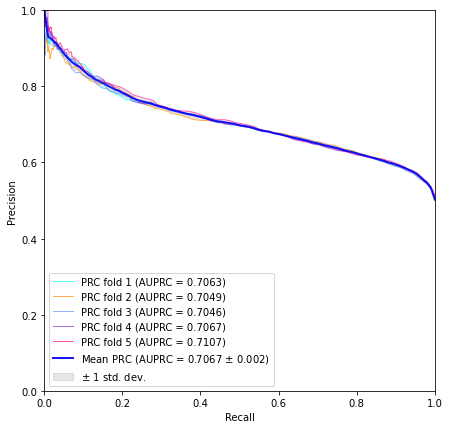

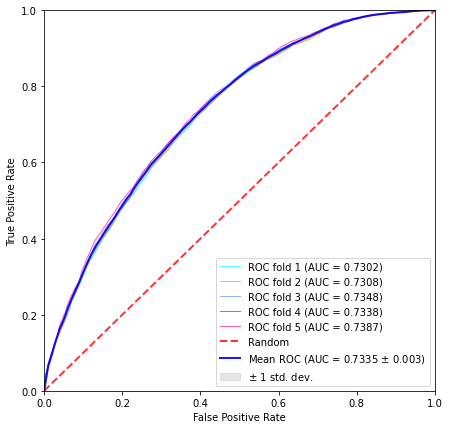

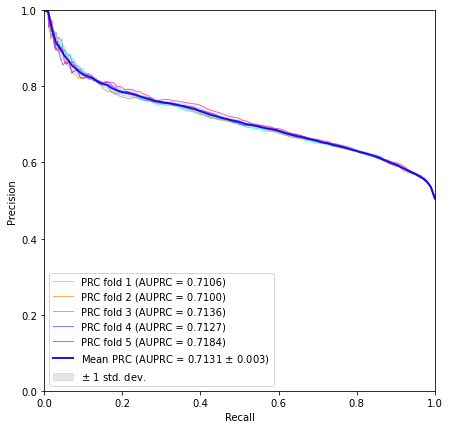

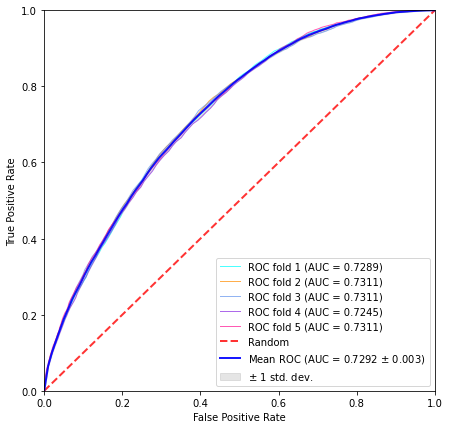

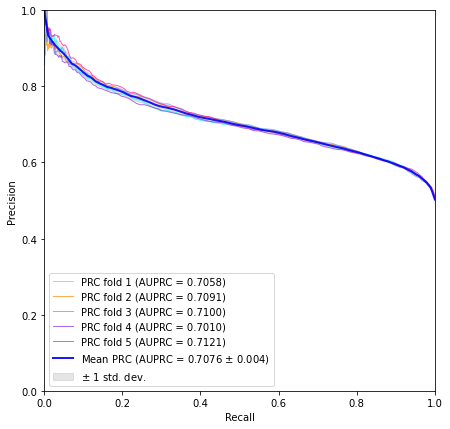

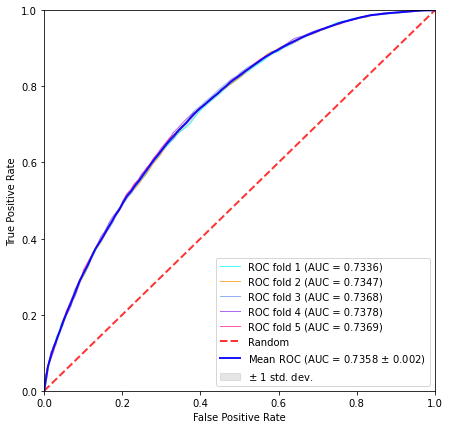

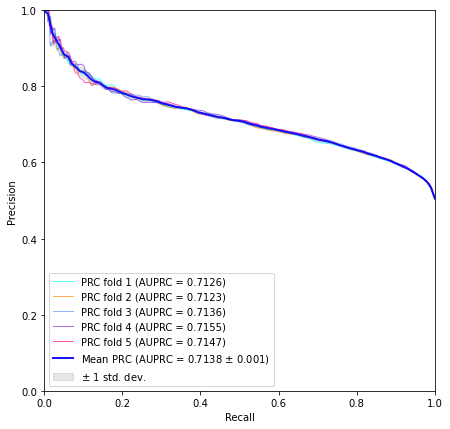

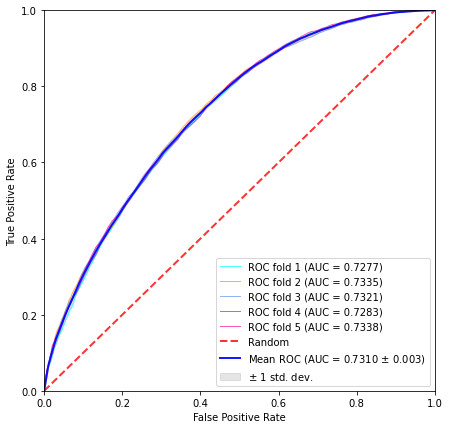

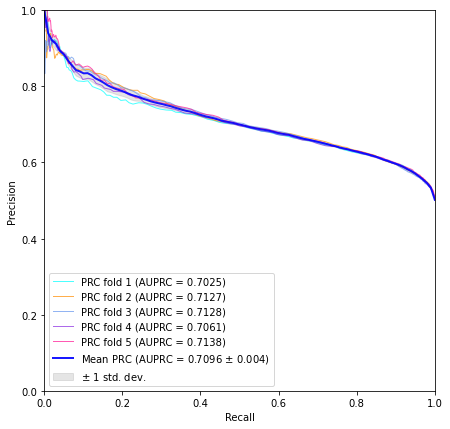

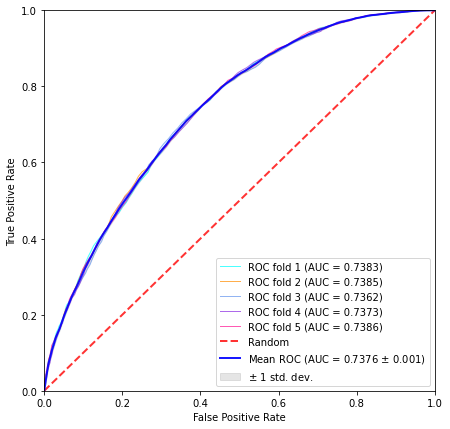

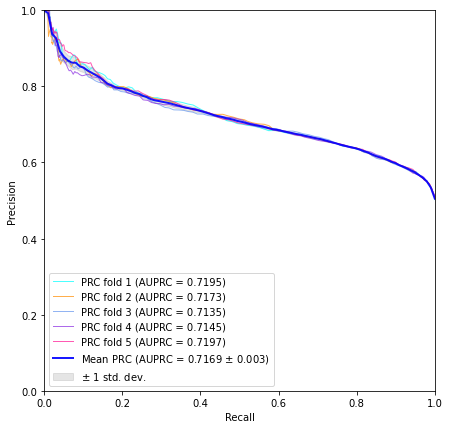

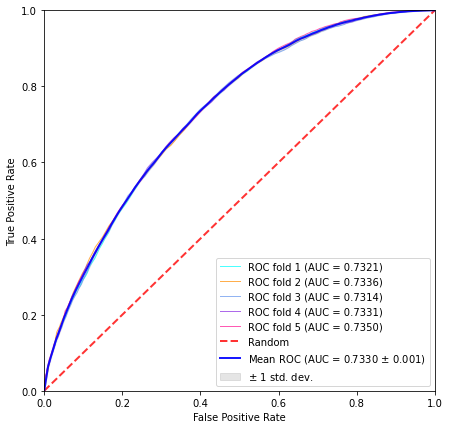

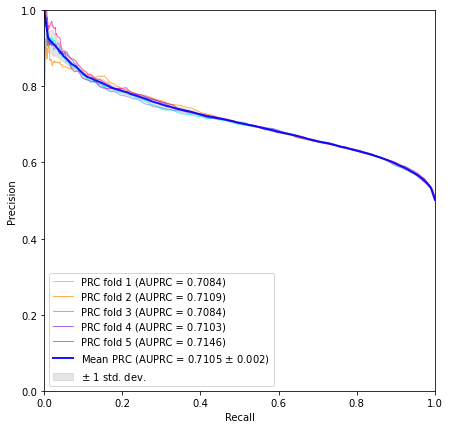

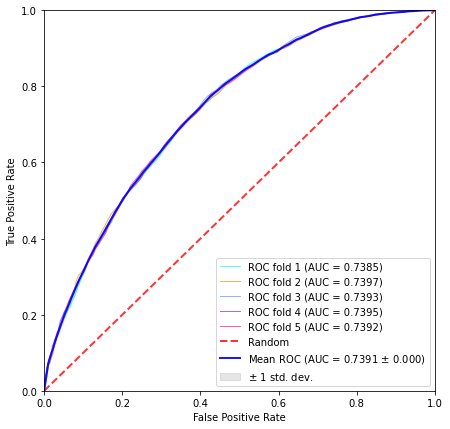

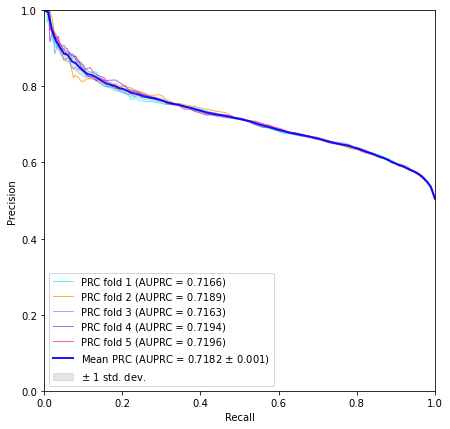

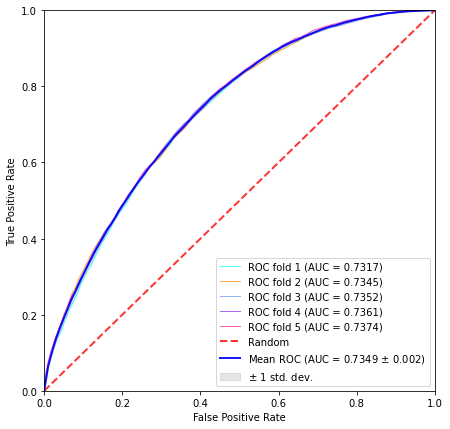

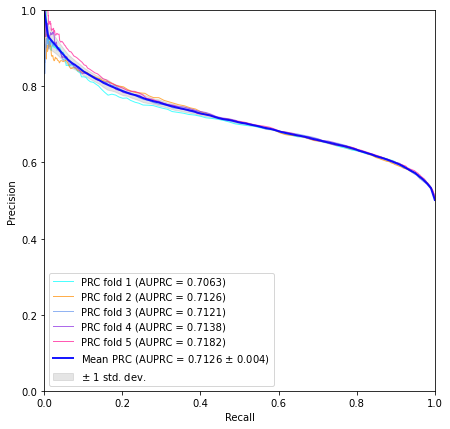

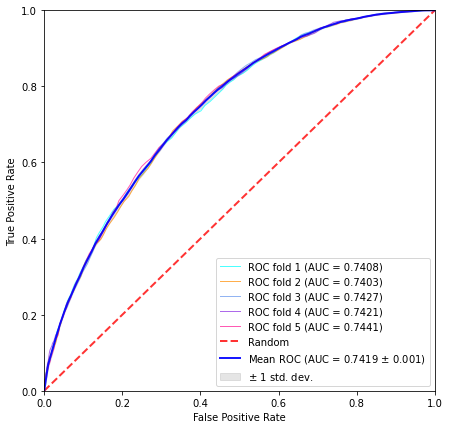

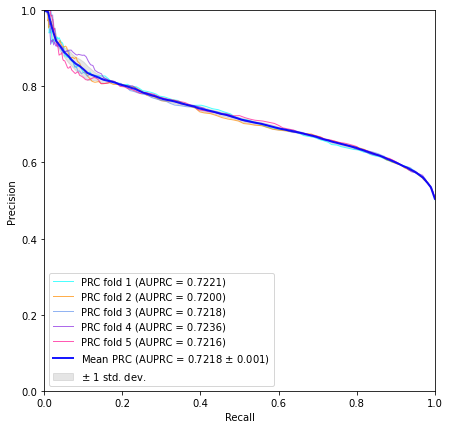

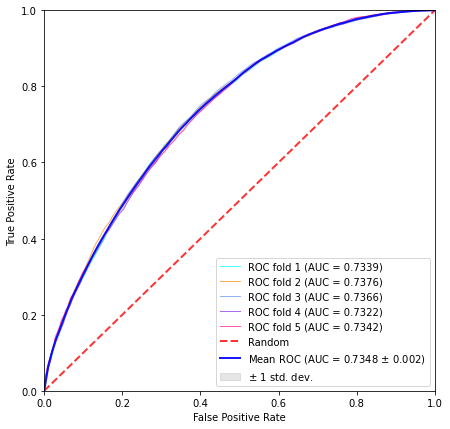

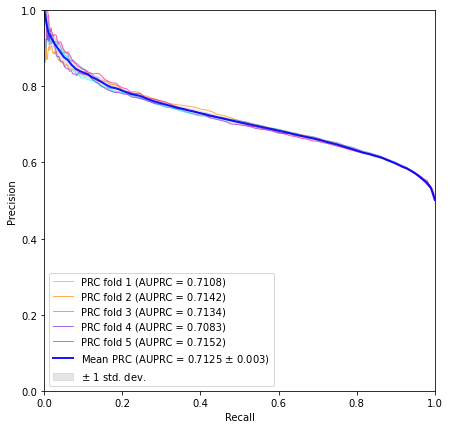

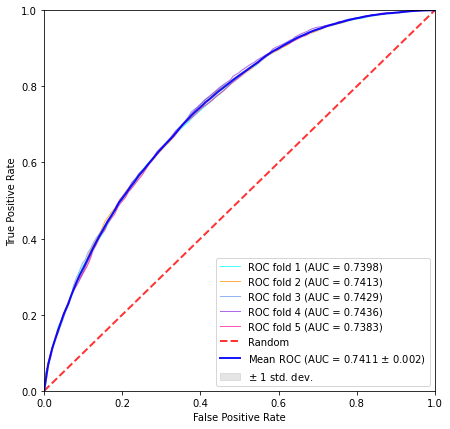

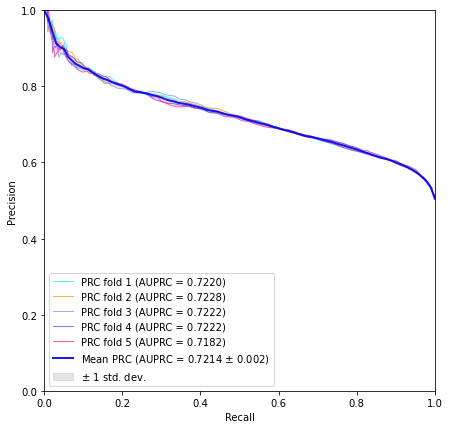

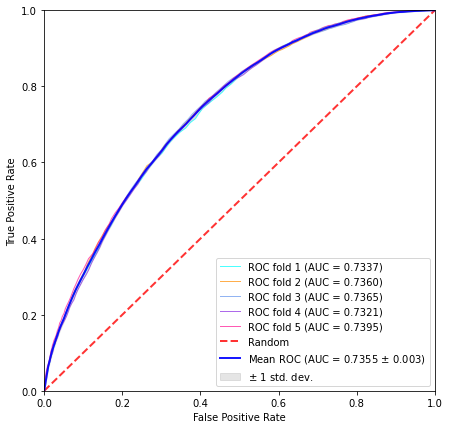

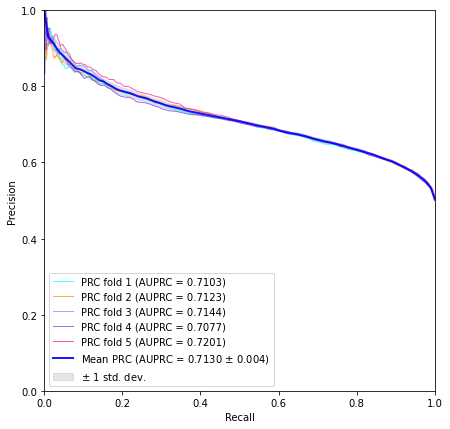

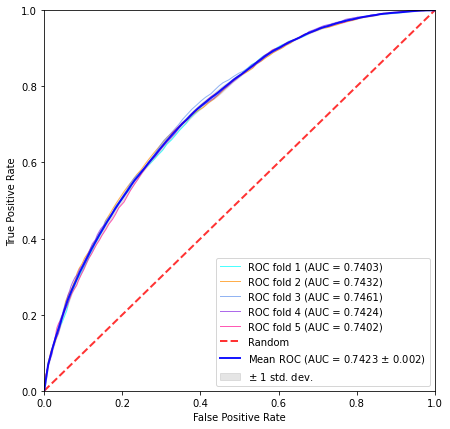

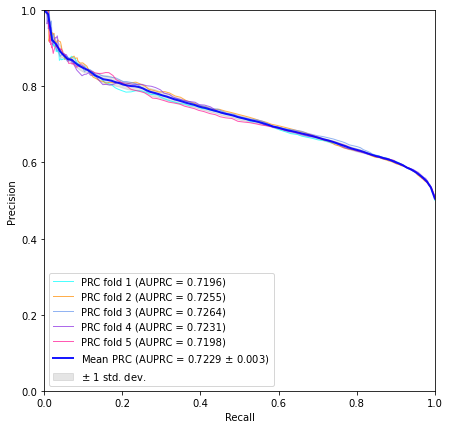

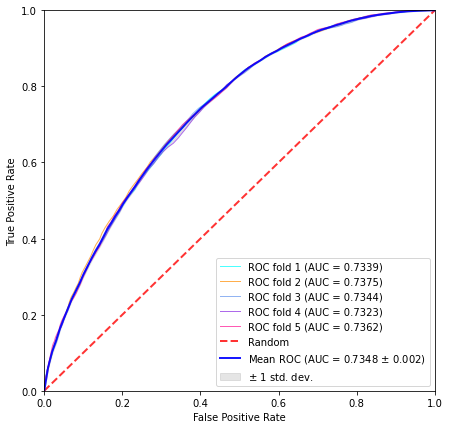

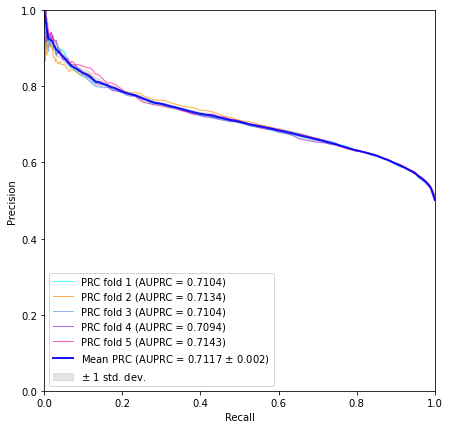

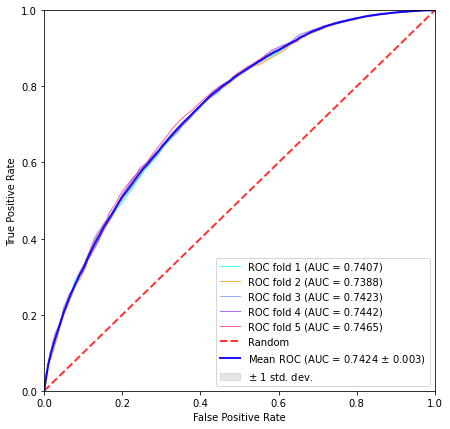

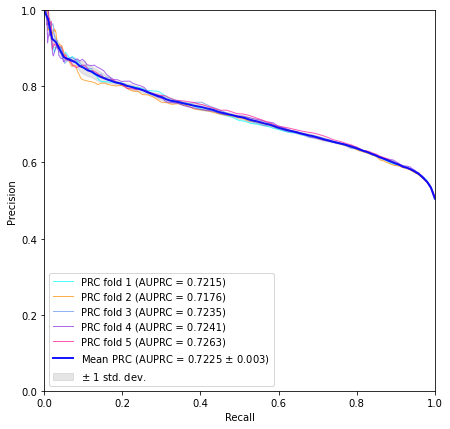

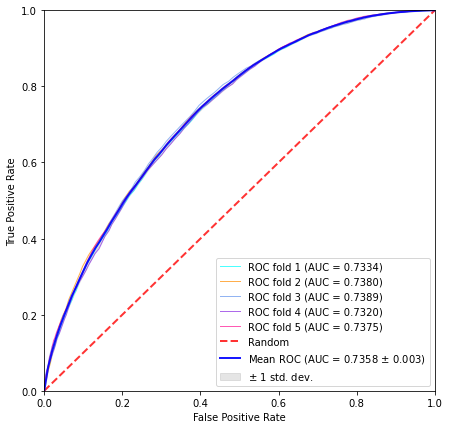

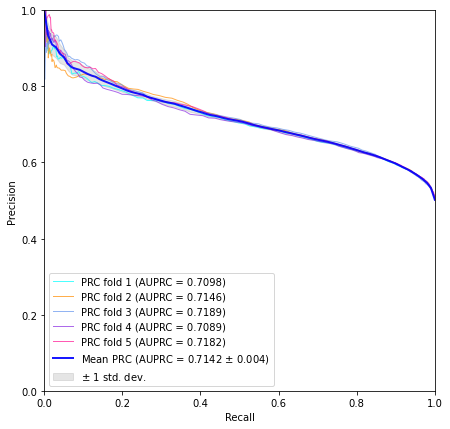

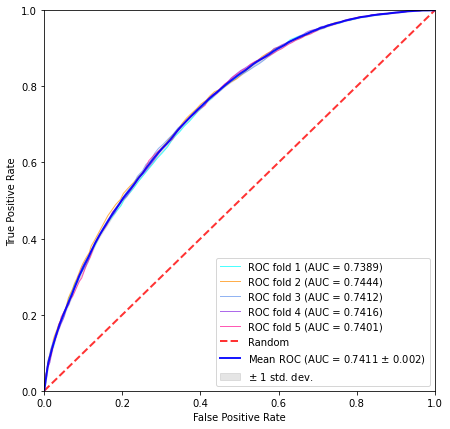

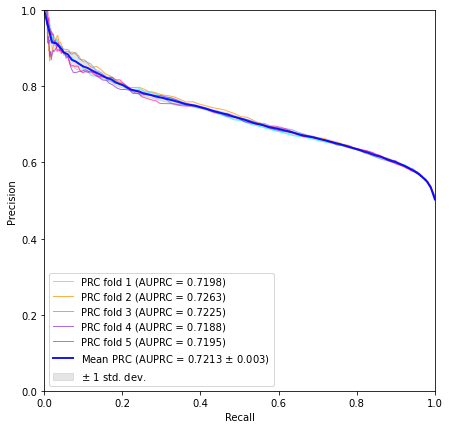

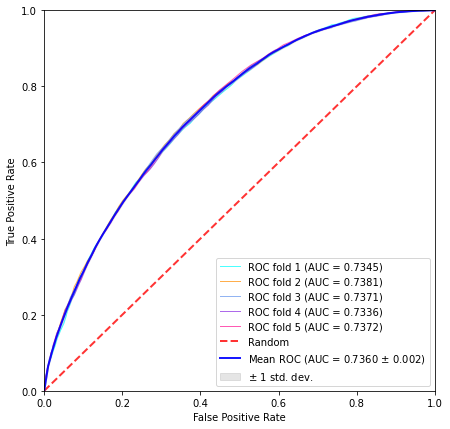

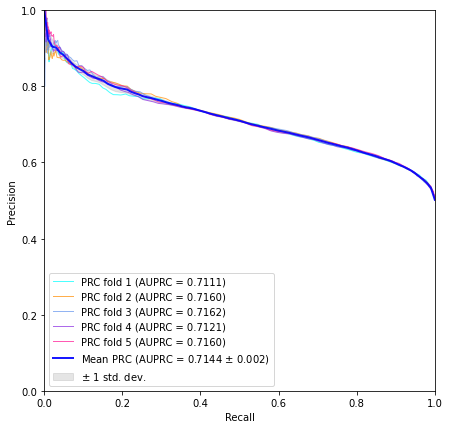

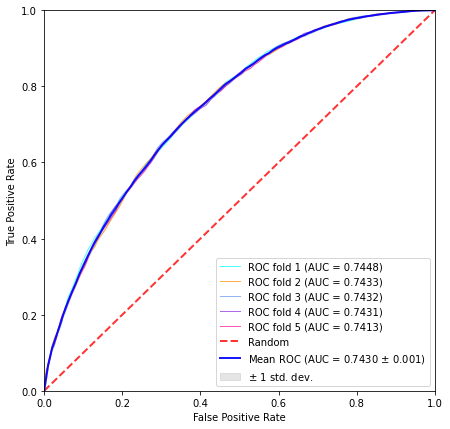

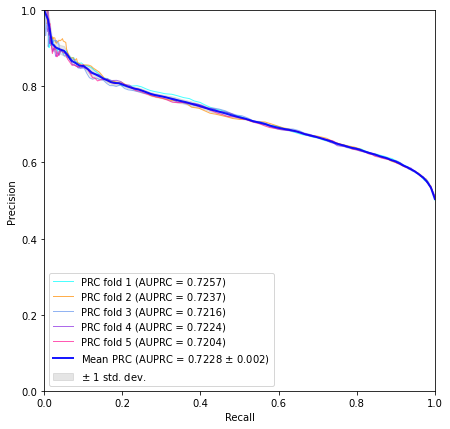

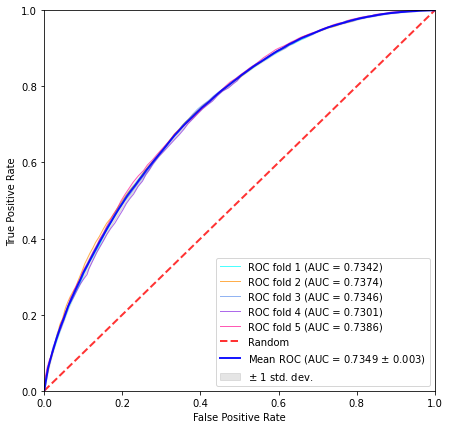

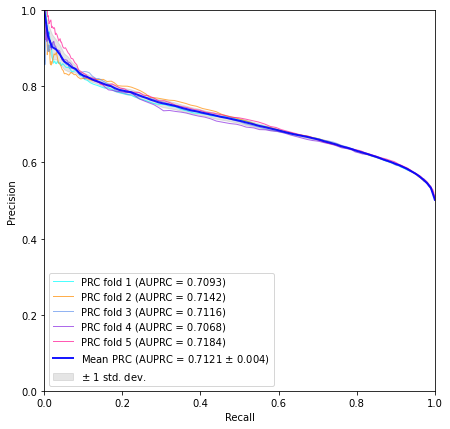

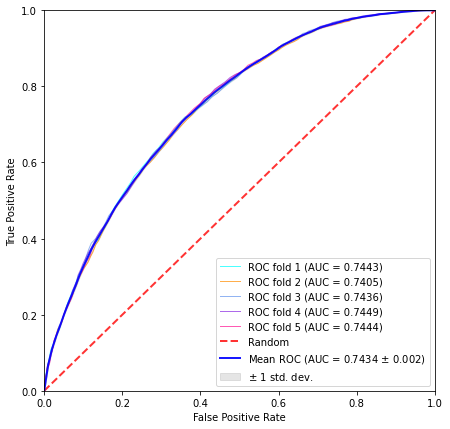

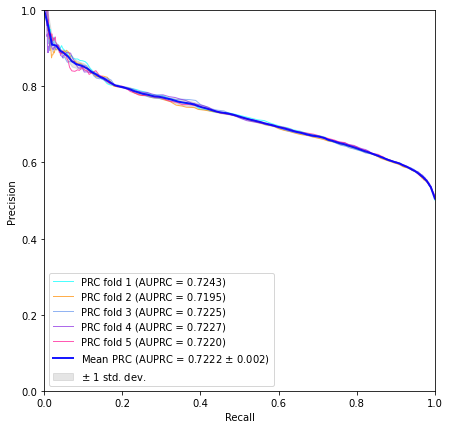

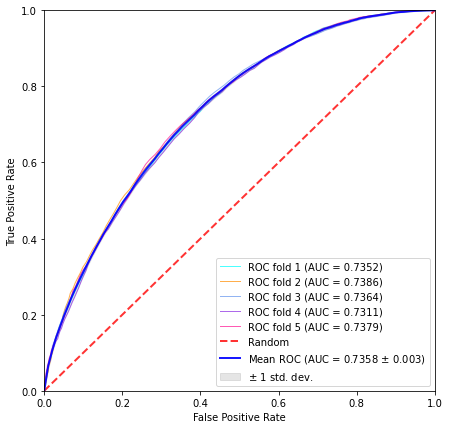

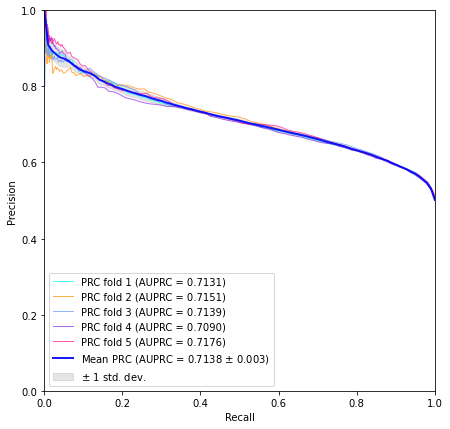

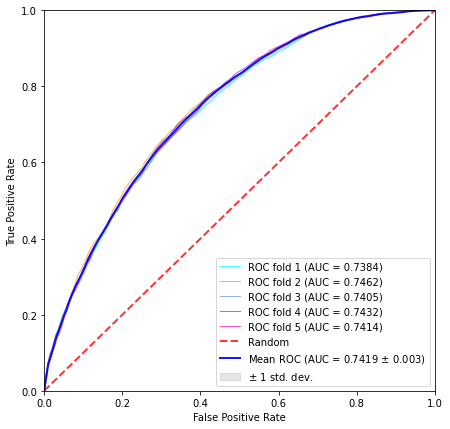

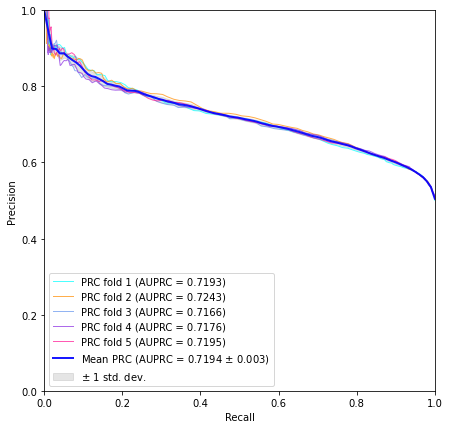

In [18]:
for size in windows:
    train_name = 'training' + str(size) + '.csv'
    test_name = 'testing' + str(size) + '.csv'
    X, Y = EAAC(os.path.join(filepath, train_name))
    x, y = EAAC(os.path.join(filepath, test_name))
    cv_result, ind_result = Random_Forest(X, Y, x, y)
    out = os.path.join(savepath, 'Result'+str(size))
    mkdir(out)
    subout = os.path.join(out, str(size))
    # Save cross-validation results
    Function.save_predict_result(cv_result, subout + '_pre_cv.txt')
    cv_meanauc, cv_auc = Function.plot_roc_curve(cv_result, subout + '_roc_cv.png', label_column=0, score_column=2)
    cv_meanprc, cv_prc = Function.plot_prc_curve(cv_result, subout + '_prc_cv.png', label_column=0, score_column=2)
    cv_metrics = Function.calculate_metrics_list(cv_result, label_column=0, score_column=2, cutoff=0.5, po_label=1)
    Function.save_prediction_metrics_list(cv_metrics, subout + '_metrics_cv.txt')
    # Save independent test results
    Function.save_predict_result(ind_result, subout + '_pre_ind.txt')
    ind_meanauc, ind_auc = Function.plot_roc_curve(ind_result, subout + '_roc_ind.png', label_column=0, score_column=2)
    ind_meanprc, ind_prc = Function.plot_prc_curve(ind_result, subout + '_prc_ind.png', label_column=0, score_column=2)
    ind_metrics = Function.calculate_metrics_list(ind_result, label_column=0, score_column=2, cutoff=0.5, po_label=1)
    Function.save_prediction_metrics_list(ind_metrics, subout + '_metrics_ind.txt')
    
    print('**** %d 窗口运算结束***' %size)

### Draw the AUC, SP, and SN values under each window

In [7]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
data = pd.read_csv(os.path.join(savepath, 'result_metrics.csv'), sep='\t')
sizes = list(data['sizes'])
sn = list(data['SN'])
sp = list(data['SP'])
auc = list(data['AUC'])

In [8]:
data

,sizes,SN,SP,ACC,MCC,Recall,Precision,F1-score,AUC,Cutoff
0,15,0.741685,0.575751,0.658718,0.321911,0.741685,0.636129,0.684856,0.7248,0.5
1,17,0.746245,0.581599,0.663922,0.332383,0.746245,0.640743,0.689480,0.7302,0.5
2,19,0.752951,0.583208,0.668079,0.341119,0.752951,0.643691,0.694041,0.7335,0.5
3,21,0.750697,0.591202,0.670950,0.346351,0.750697,0.647457,0.695250,0.7358,0.5
4,23,0.754077,0.591202,0.672639,0.349954,0.754077,0.648461,0.697291,0.7376,0.5
5,25,0.754185,0.592597,0.673391,0.351406,0.754185,0.649267,0.697801,0.7391,0.5
6,27,0.756116,0.592758,0.674437,0.353626,0.756116,0.649941,0.699019,0.7419,0.5
7,29,0.750590,0.593830,0.672210,0.348739,0.750590,0.648886,0.696036,0.7411,0.5
8,31,0.751502,0.595225,0.673364,0.351049,0.751502,0.649924,0.697029,0.7423,0.5
9,33,0.751073,0.598927,0.675000,0.354134,0.751073,0.651907,0.697976,0.7424,0.5


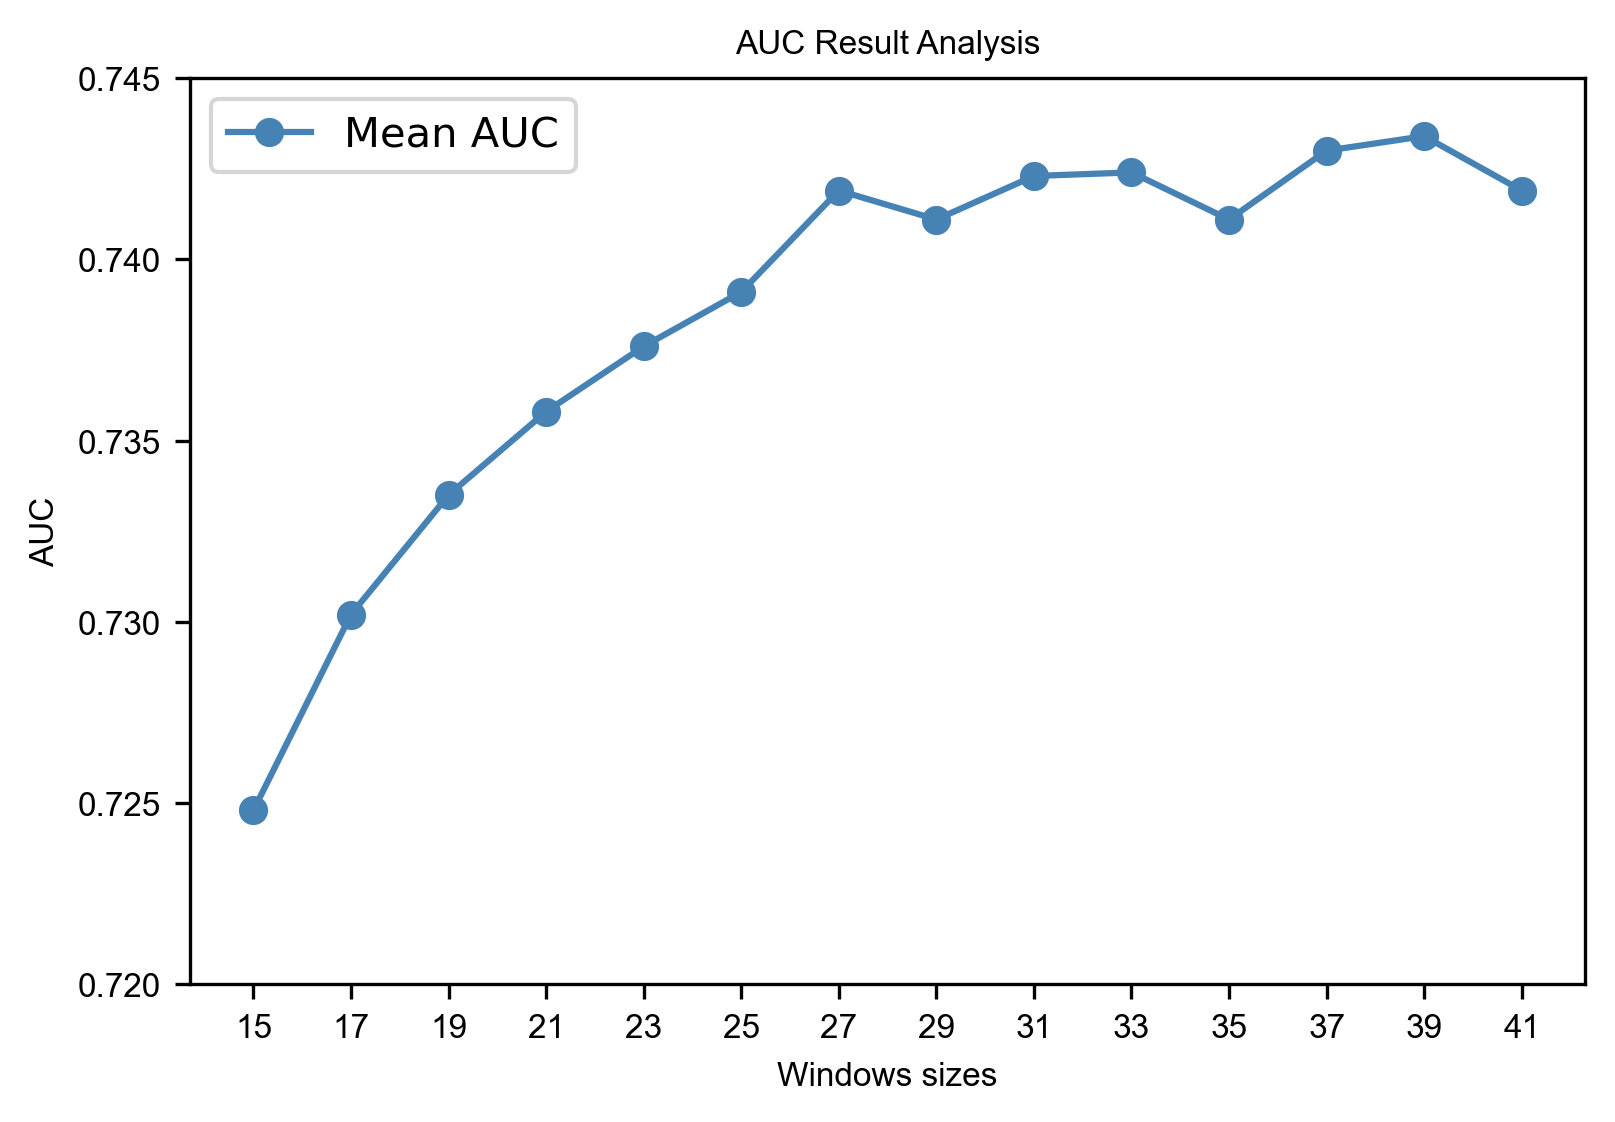

In [29]:
plt.title('AUC Result Analysis', fontdict={'family':'Arial','size' : 8})
plt.plot(sizes, auc, color='steelblue', marker='o', label='Mean AUC',)
plt.legend(loc="upper left")
plt.xticks(np.arange(15, 42, 2),fontproperties = 'Arial', size = 8)
plt.yticks(np.arange(0.7200, 0.7450, 0.005),fontproperties = 'Arial', size = 8)
plt.xlabel('Windows sizes', fontdict={'family':'Arial','size' : 8})
plt.ylabel('AUC', fontdict={'family':'Arial','size' : 8})
plt.savefig(os.path.join(savepath, 'ChooseWindows.png'),dpi=400)

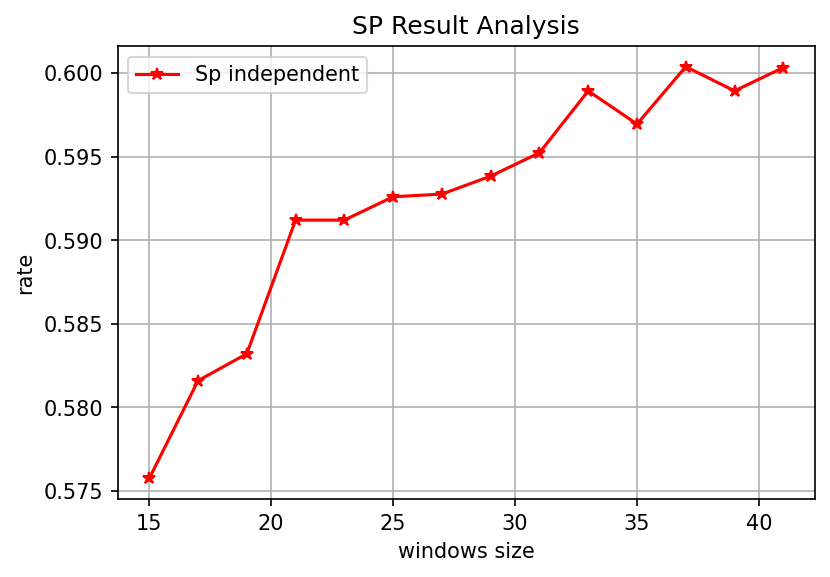

In [28]:
plt.title('SP Result Analysis')
plt.plot(sizes, sp, color='red', marker='*', label='Sp independent')
plt.legend()
plt.xlabel('windows size')
plt.ylabel('rate')
plt.grid()
plt.show()

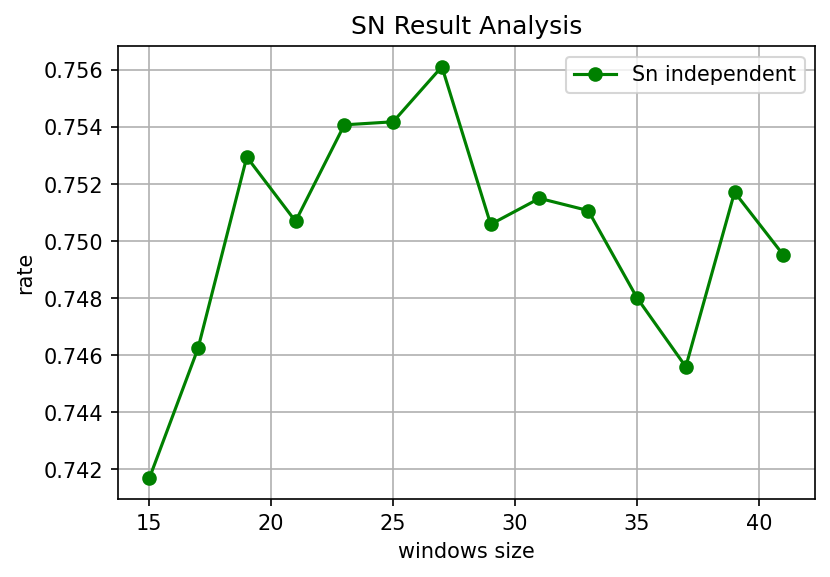

In [29]:
plt.title('SN Result Analysis')
plt.plot(sizes, sn, color='green', marker='o', label='Sn independent')
plt.legend()

plt.xlabel('windows size')
plt.ylabel('rate')
plt.grid()
plt.show()

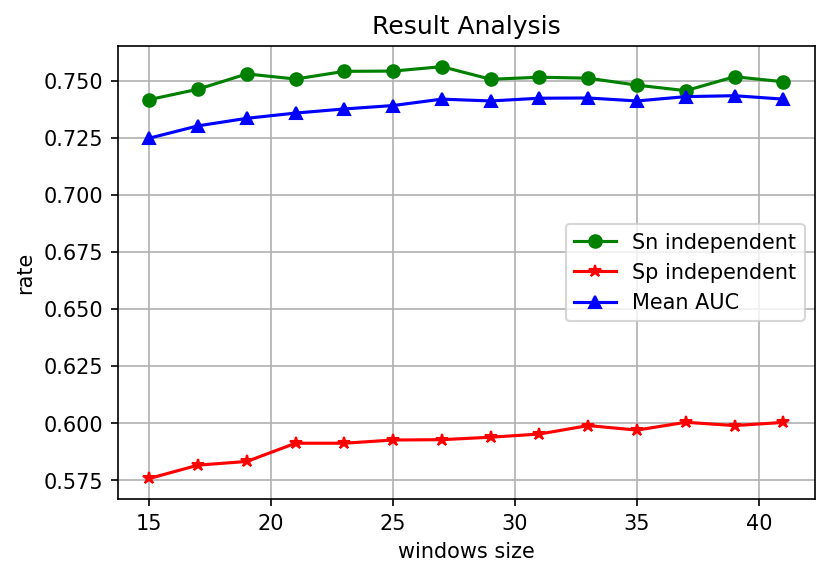

In [30]:
plt.title('Result Analysis')
plt.plot(sizes, sn, color='green', marker='o', label='Sn independent')
plt.plot(sizes, sp, color='red', marker='*', label='Sp independent')
plt.plot(sizes, auc, color='blue', marker='^', label='Mean AUC')
plt.legend()

plt.xlabel('windows size')
plt.ylabel('rate')
plt.grid()
plt.show()

# Considering the SP SN AUC, the selection window size is 39